In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [3]:
df=pd.read_csv('../processed_data/training_data.csv')
df.head(2)

,Unnamed: 0,Australia,Central_Rich_Europe,East_Europe_Balkans,Mediteranian_Europe,North_Europe_Scand,user_id,birth_year,country,city,...,LOST_CARD_ORDER,MADE_MONEY_REQUEST_NOT_SPLIT_BILL,METAL_RESERVE_PLAN,NO_INITIAL_CARD_ORDER,NO_INITIAL_CARD_USE,ONBOARDING_TIPS_ACTIVATED_USERS,PROMO,PROMO_CARD_ORDER,REENGAGEMENT_ACTIVE_FUNDS,WELCOME_BACK
0,0,0,0,0,1,0,user_0,1992,Mediteranian_Europe,Madrid,...,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,0.0
1,1,0,0,1,0,0,user_1,1985,East_Europe_Balkans,Klaipeda,...,0.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,3.0,0.0


In [4]:
features = ['total_amount', 'number_transactions' ,'transaction_period', 'age', 'user_settings_crypto_unlocked', 
            'brand', 'num_contacts', 'user_active_time' ,'user_trans_time', 'user_trans_periodicity','BLACK_FRIDAY',	'BLUE_TUESDAY',	'ENGAGEMENT_SPLIT_BILL_RESTAURANT',	'INVEST_IN_GOLD',	'JOINING_ANNIVERSARY',
            'LOST_CARD_ORDER',	'MADE_MONEY_REQUEST_NOT_SPLIT_BILL',	'METAL_RESERVE_PLAN',	'NO_INITIAL_CARD_ORDER',
            'NO_INITIAL_CARD_USE',	'ONBOARDING_TIPS_ACTIVATED_USERS',	'PROMO',	'PROMO_CARD_ORDER',	'REENGAGEMENT_ACTIVE_FUNDS',
            'WELCOME_BACK','ATM',	'CARD_PAYMENT',	'CARD_REFUND',	'EXCHANGE',	'REFUND',	'TAX',	'TOPUP',	'TRANSFER',
            'CHF',	'EUR',	'GBP',	'OTHER','Australia',	'Central_Rich_Europe',	'East_Europe_Balkans',
            'Mediteranian_Europe',	'North_Europe_Scand']

countries = ['Australia',	'Central_Rich_Europe',	'East_Europe_Balkans',	'Mediteranian_Europe',	'North_Europe_Scand']


currency = [	'CHF',	'EUR',	'GBP',	'OTHER']


transactions = ['BLACK_FRIDAY',	'BLUE_TUESDAY',	'ENGAGEMENT_SPLIT_BILL_RESTAURANT',	'INVEST_IN_GOLD',	'JOINING_ANNIVERSARY',
                'LOST_CARD_ORDER',	'MADE_MONEY_REQUEST_NOT_SPLIT_BILL',	'METAL_RESERVE_PLAN',	'NO_INITIAL_CARD_ORDER',
                'NO_INITIAL_CARD_USE',	'ONBOARDING_TIPS_ACTIVATED_USERS',	'PROMO',	'PROMO_CARD_ORDER',	'REENGAGEMENT_ACTIVE_FUNDS',
                'WELCOME_BACK']

notifications = ['ATM',	'CARD_PAYMENT',	'CARD_REFUND',	'EXCHANGE',	'REFUND',	'TAX',	'TOPUP',	'TRANSFER']

user_attributes = ['total_amount', 'number_transactions' ,'transaction_period', 'age', 'user_settings_crypto_unlocked', 
                   'brand', 'num_contacts', 'user_active_time' ,'user_trans_time', 'user_trans_periodicity']

x=df[features].copy()
y=df['plan']

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape,y_train.shape)

(12435, 42) (12435,)


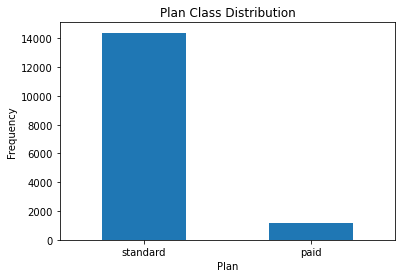

In [6]:
labels=['standard','paid']
count_classes=pd.value_counts(df['plan'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title('Plan Class Distribution')
plt.xticks(range(2),labels)
plt.xlabel('Plan')
plt.ylabel('Frequency')
plt.show()

In [7]:
Standard=df[df['plan']==0]
Paid=df[df['plan']==1]
print(Standard.shape,Paid.shape)

(14394, 56) (1150, 56)


In [8]:
os=SMOTE()
X_train,Y_train=os.fit_sample(x_train,y_train)
print('Original dataset shape is : ',x_train.shape, ' and ',y_train.shape)
print('Resampled dataset shape is: ',X_train.shape,' and ',Y_train.shape)

Original dataset shape is :  (12435, 42)  and  (12435,)
Resampled dataset shape is:  (23030, 42)  and  (23030,)


In [9]:
ssc=StandardScaler()
ssc.fit_transform(X_train)
ssc.transform(x_test)

array([[-0.2320338 , -0.63430518, -1.61724637, ...,  2.23269506,
        -0.45874705, -0.70188583],
       [-0.24455669, -0.70418938, -1.86540412, ..., -0.4478892 ,
         2.17985051, -0.70188583],
       [-0.23324297, -0.67560039,  1.92900795, ..., -0.4478892 ,
         2.17985051, -0.70188583],
       ...,
       [-0.23879951, -0.69148316, -1.25701737, ..., -0.4478892 ,
        -0.45874705,  1.42473313],
       [-0.24463858, -0.70418938, -1.57722092, ...,  2.23269506,
        -0.45874705, -0.70188583],
       [-0.20289726, -0.49771332,  0.26394949, ..., -0.4478892 ,
        -0.45874705,  1.42473313]])

In [10]:
#  grid={'activation':['relu'],#'logistic','identity','tanh'],
#       'learning_rate_init':[0.0001],
#       'solver':['adam'],
#       'batch_size':[128]
#       #'momentum':[0.5]
#        }

# mlp=MLPClassifier()
# gs=GridSearchCV(mlp,grid,cv=5,scoring='accuracy')
# gs_result=gs.fit(X_train,Y_train)
# print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))
# mlp_pred=gs.predict(x_test)
# print(accuracy_score(y_test,mlp_pred))
# print(classification_report(y_test,mlp_pred))

In [11]:
# var = VarianceThreshold()

# rf = RandomForestClassifier(n_estimators=50, n_jobs=-1)
# rf.fit(X_train, Y_train)
# rf.feature_importances_

# for c, imp in sorted(zip(features, rf.feature_importances_), key=lambda pair: pair[1], reverse=True):
#   print('{:20}: {}'.format(c, imp))

# rf = RandomForestClassifier()

# pipe1 = Pipeline([('selector', var),
#                   ('model', rf)])

# grid1 = {'selector__threshold': [0, 0.01, 0.5],
#          'model__n_estimators': [101,102,103,104,105]}

# clf = GridSearchCV(pipe1, grid1)
# clf.fit(X_train, Y_train)

# print(clf.best_params_, '\n')
# print(classification_report(y_test, clf.predict(x_test)))

In [18]:
# grid2 = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#          'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#          'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#          }


log = LogisticRegression(C=0.1, penalty= 'l2', solver= 'newton-cg')
gs = GridSearchCV( log, grid2, cv=3, scoring='accuracy')
gs.fit(X_train,Y_train)
log_pred = gs.predict(x_test)
print(gs.best_params_, '\n')
print(accuracy_score(y_test,log_pred))
print(classification_report(y_test,log_pred))

c:\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these

c:\python\python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\python\python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\python\python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterat

c:\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not

c:\python\python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\python\python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\python\python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterat

c:\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not

c:\python\python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\python\python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\python\python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterat

c:\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not

c:\python\python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\python\python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\python\python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ex

c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    ht

c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ex

c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    ht

c:\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\python\python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\python\python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\python\python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

c:\python\python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\python\python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED L

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'} 

0.9610807333547765
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2879
           1       0.71      0.80      0.75       230

    accuracy                           0.96      3109
   macro avg       0.85      0.89      0.87      3109
weighted avg       0.96      0.96      0.96      3109



c:\python\python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [20]:
pip install jupyterthemes

Note: you may need to restart the kernel to use updated packages.


SyntaxError: invalid syntax (<ipython-input-21-de2e746ade80>, line 1)